<a href="https://colab.research.google.com/github/IHS618/Git-Tutorial/blob/master/120210399%EC%9E%84%ED%9D%AC%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

In [7]:
y = y_train[1]
yname = class_names[y]
print(y, " >> ", yname)

0  >>  T-shirt/top


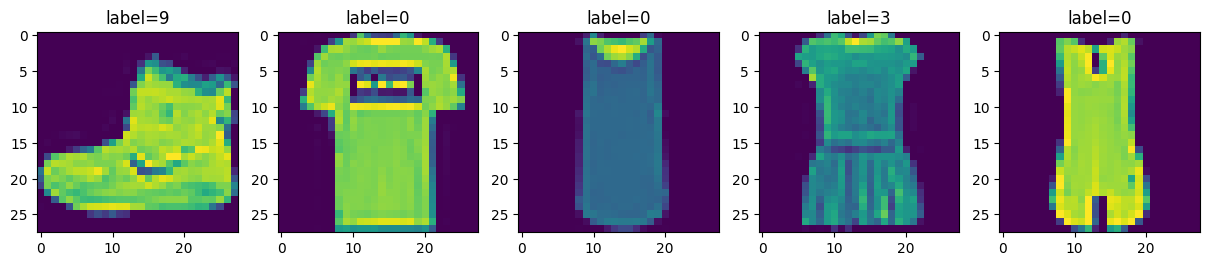

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), dpi=100)
for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%d" % label)
plt.savefig('fasion1.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

In [9]:
np.random.seed(777)

In [10]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(f'훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_train_reshape.shape}')

훈련 데이터 (60000, 28, 28, 1) / 검증 데이터 (60000, 28, 28, 1)


In [12]:
model = Sequential()
# Conv2D
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
# 표준화
model.add(BatchNormalization())
# MaxPool2D
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# 랜덤으로 25%의 뉴런을 쉬게함
model.add(Dropout(0.25))
# 이전보다 filter는 크게, kelnel_size는 작게, input_shape는 최초에만 적용하므로 여기서는 생략
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
# 1차원으로 변환하기 위한 Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# 최종 아웃풋의 수는 one_hot_encoding의 원소 수 만큼
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [13]:
result = model.fit(x_train_reshape, y_train_one_hot, epochs=500, validation_data=(x_test_reshape, y_test_one_hot), callbacks = [
  #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
  EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
  ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1875/1875 [==============================] - 157s 83ms/step - loss: 0.4142 - acc: 0.8485 - val_loss: 0.3482 - val_acc: 0.8734 - lr: 0.0010
Epoch 2/500
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2882 - acc: 0.8945 - val_loss: 0.2720 - val_acc: 0.9056 - lr: 0.0010
Epoch 3/500
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2544 - acc: 0.9059 - val_loss: 0.2927 - val_acc: 0.9010 - lr: 0.0010
Epoch 4/500
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2350 - acc: 0.9129 - val_loss: 0.2725 - val_acc: 0.9071 - lr: 0.0010
Epoch 5/500
1875/1875 [==============================] - 149s 80ms/step - loss: 0.2133 - acc: 0.9218 - val_loss: 0.2621 - val_acc: 0.9104 - lr: 0.0010
Epoch 6/500
1875/1875 [==============================] - 151s 80ms/step - loss: 0.1993 - acc: 0.9254 - val_loss: 0.2559 - val_acc: 0.9176 - lr: 0.0010
Epoch 7/500
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1845 - acc: 

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.414175,0.848467,0.348166,0.8734,0.0010
2,0.288229,0.894517,0.271953,0.9056,0.0010
3,0.254356,0.905867,0.292749,0.9010,0.0010
4,0.234980,0.912950,0.272529,0.9071,0.0010
5,0.213329,0.921833,0.262119,0.9104,0.0010
6,0.199308,0.925367,0.255935,0.9176,0.0010
7,0.184452,0.932233,0.255133,0.9180,0.0010
8,0.172858,0.935583,0.240626,0.9181,0.0010
9,0.159402,0.940783,0.270022,0.9159,0.0010


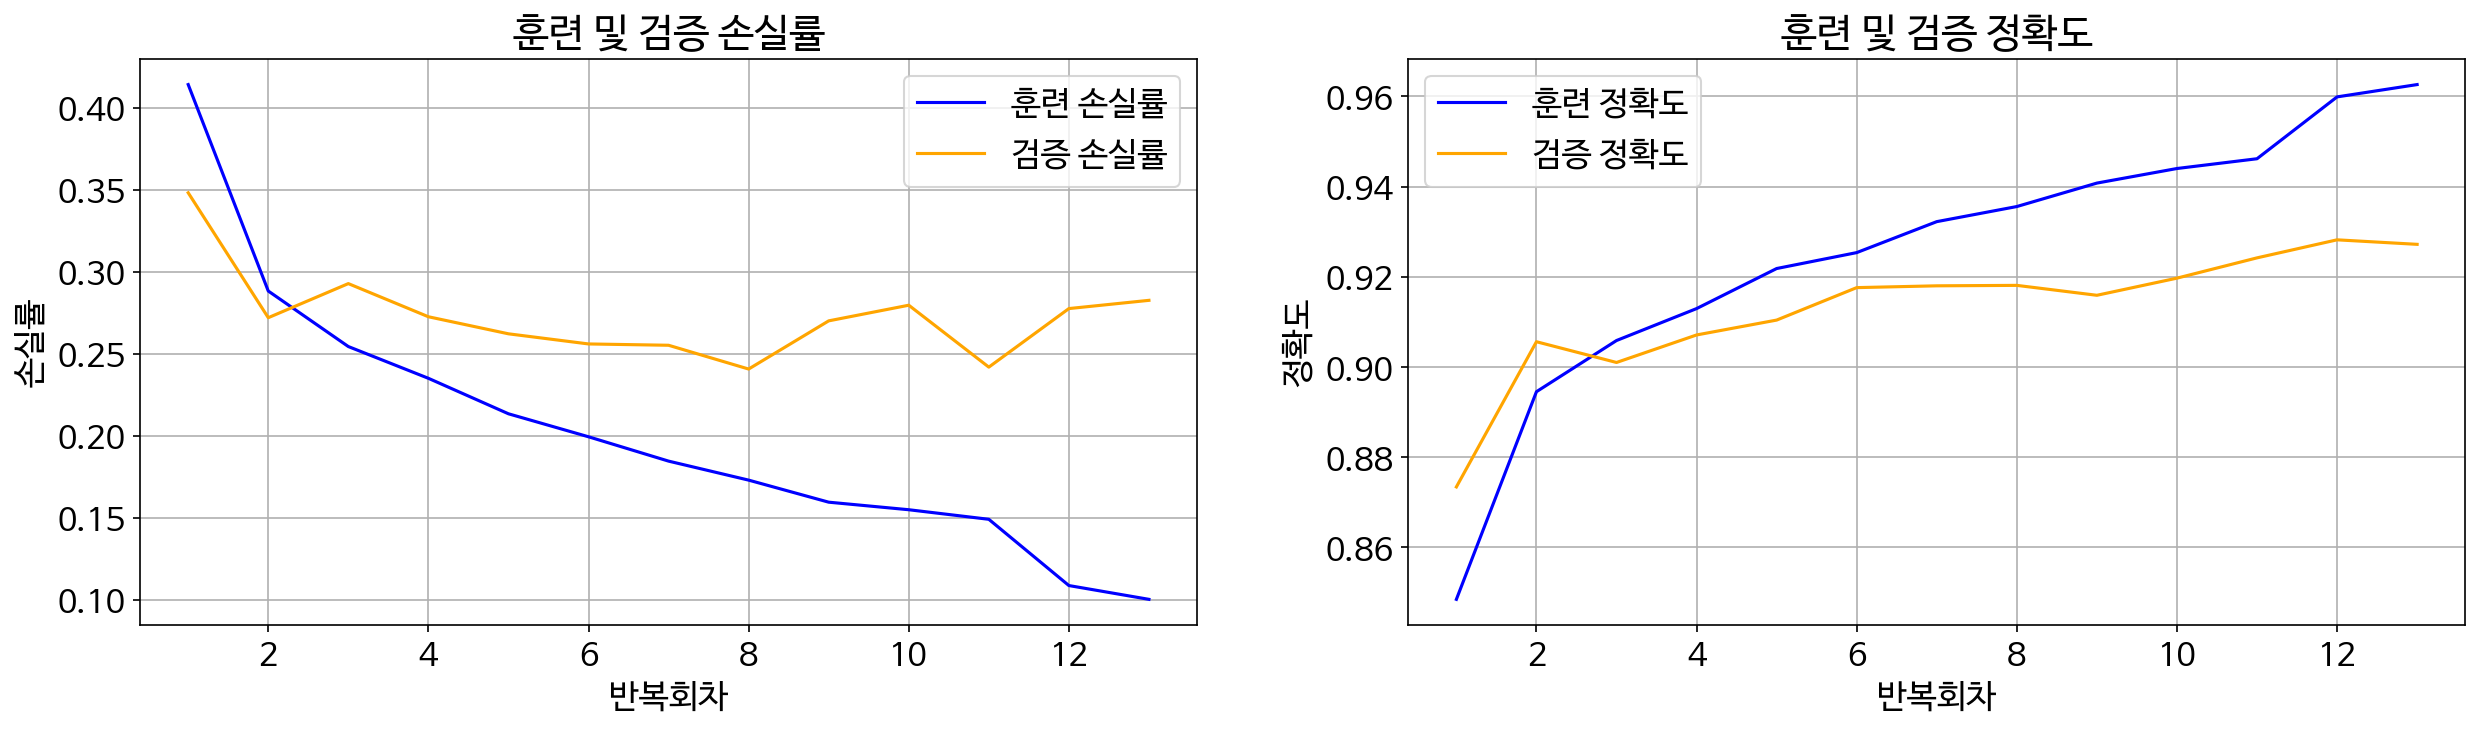

In [21]:
# 그래프 기본 설정
# ----------------------------------------
# plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False
# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)
# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()
# 2) 훈련 및 정확도 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()
plt.savefig('fasion2.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

In [15]:
evaluate = model.evaluate(x_test_reshape, y_test_one_hot)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

313/313 [==============================] - 6s 19ms/step - loss: 0.2825 - acc: 0.9272
최종 손실률: 0.282541, 최종 정확도: 0.927200


In [16]:
result = model.predict(x_test_reshape)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([2.3319774e-25, 3.0827488e-27, 4.9004610e-29, 2.5951072e-24,
       3.7132603e-27, 6.6326914e-13, 9.6824159e-26, 5.5755554e-14,
       2.3770096e-18, 1.0000000e+00], dtype=float32)

In [17]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([9, 2, 1, ..., 8, 1, 5])

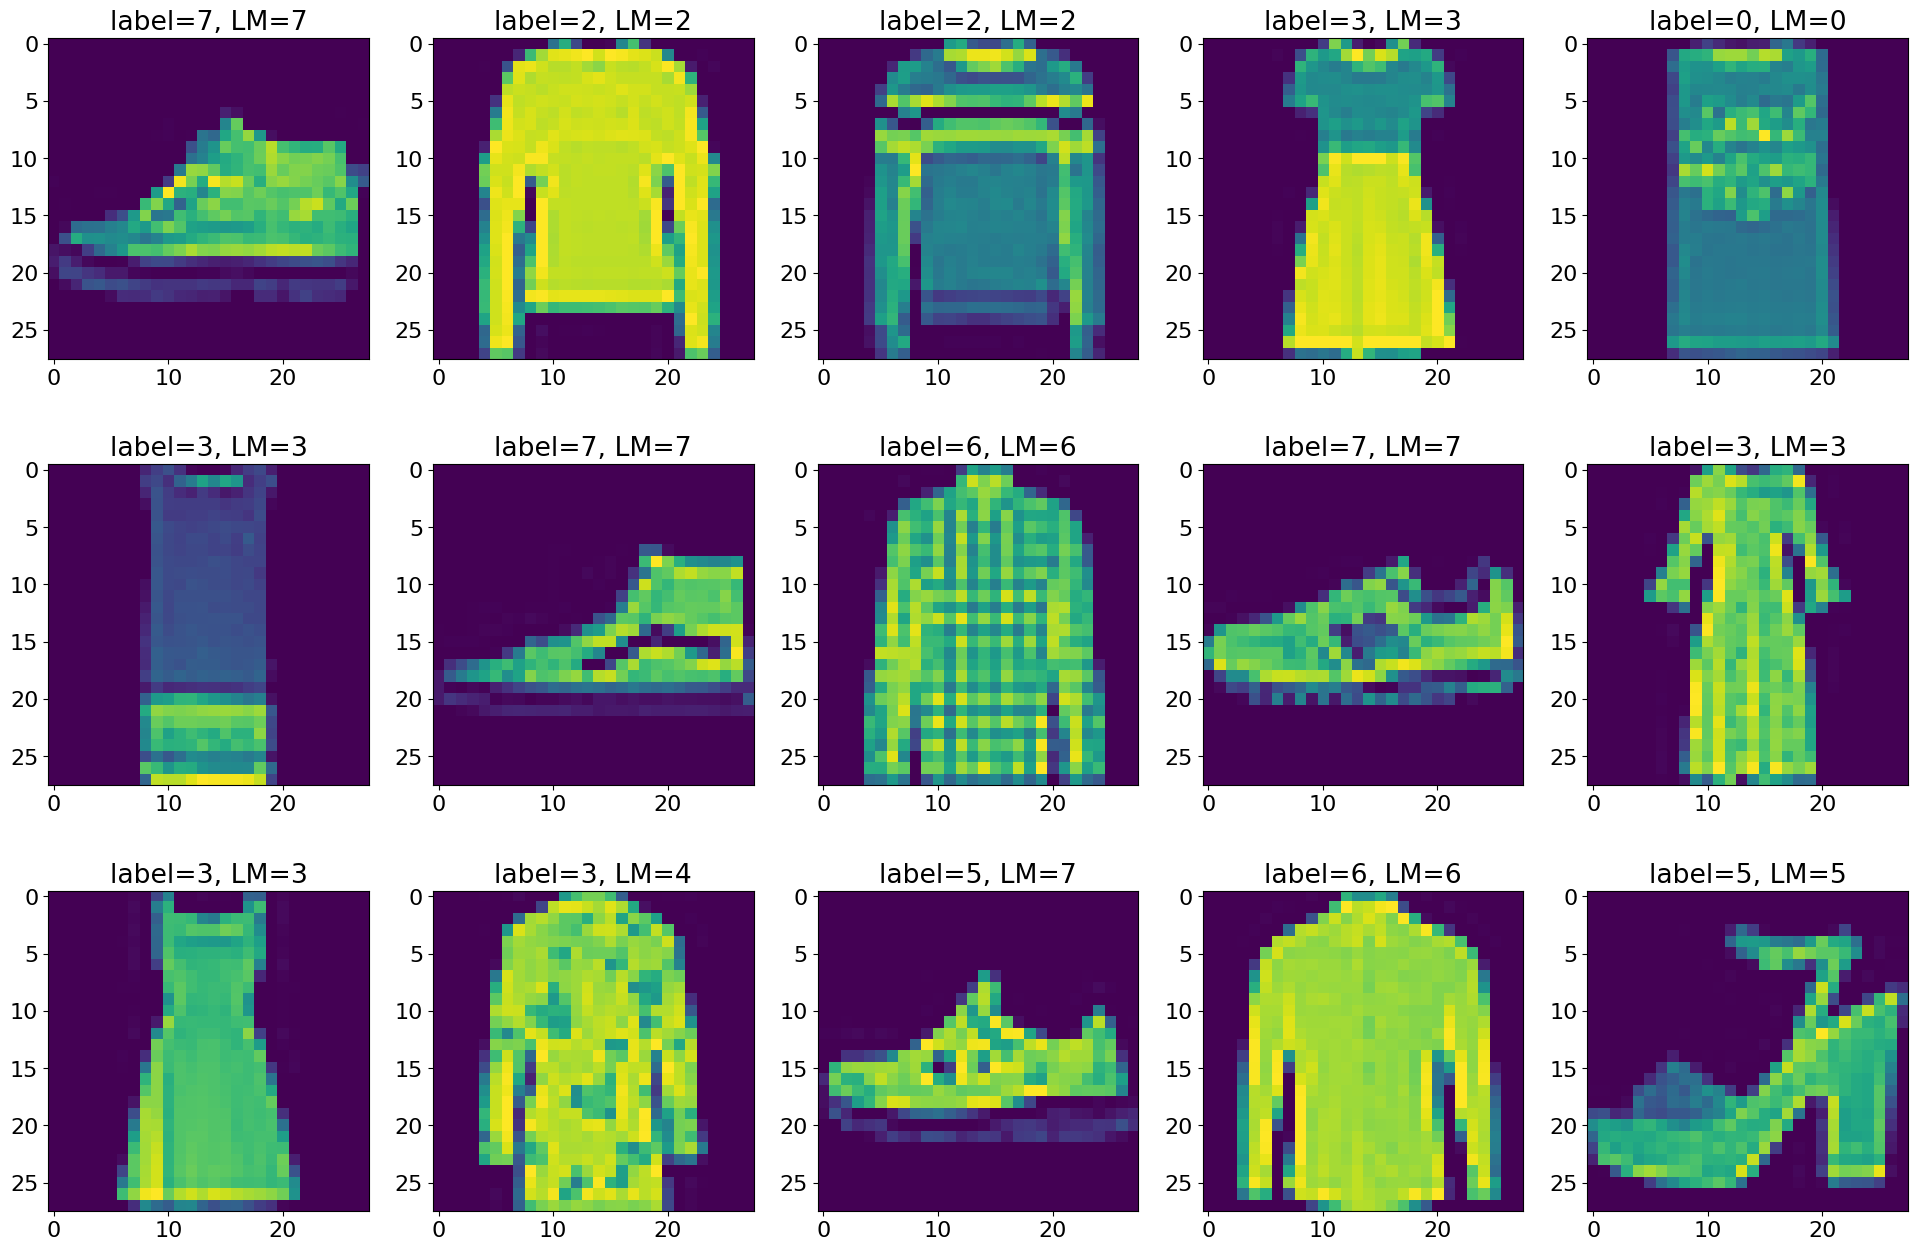

In [18]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col+1)*4, (row+1)*4), dpi=100)
size = row*col
length = len(y_test)
for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i//col][i%col].imshow(train)
    ax[i//col][i%col].set_title("label=%d, LM=%d" % (label, arg_result[k]))
plt.savefig('fasion3.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

In [23]:
cm = confusion_matrix(y_test, arg_result)
cmdf2 = DataFrame(cm, columns=list(map(lambda x: "실제값(%d)" % x, range(10))), index=list(map(lambda x: "예측값(%d)" % x,
range(10))))
cmdf2

,실제값(0),실제값(1),실제값(2),실제값(3),실제값(4),실제값(5),실제값(6),실제값(7),실제값(8),실제값(9)
예측값(0),878,0,15,14,2,2,84,0,5,0
예측값(1),1,993,0,4,0,0,1,0,1,0
예측값(2),19,1,858,7,72,0,43,0,0,0
예측값(3),10,2,8,944,20,0,16,0,0,0
예측값(4),0,0,27,20,916,0,37,0,0,0
예측값(5),0,0,0,0,0,986,0,10,0,4
예측값(6),96,0,58,21,60,0,763,0,2,0
예측값(7),0,0,0,0,0,5,0,979,0,16
예측값(8),3,1,1,3,0,1,2,0,988,1
예측값(9),0,0,1,0,0,4,0,28,0,967


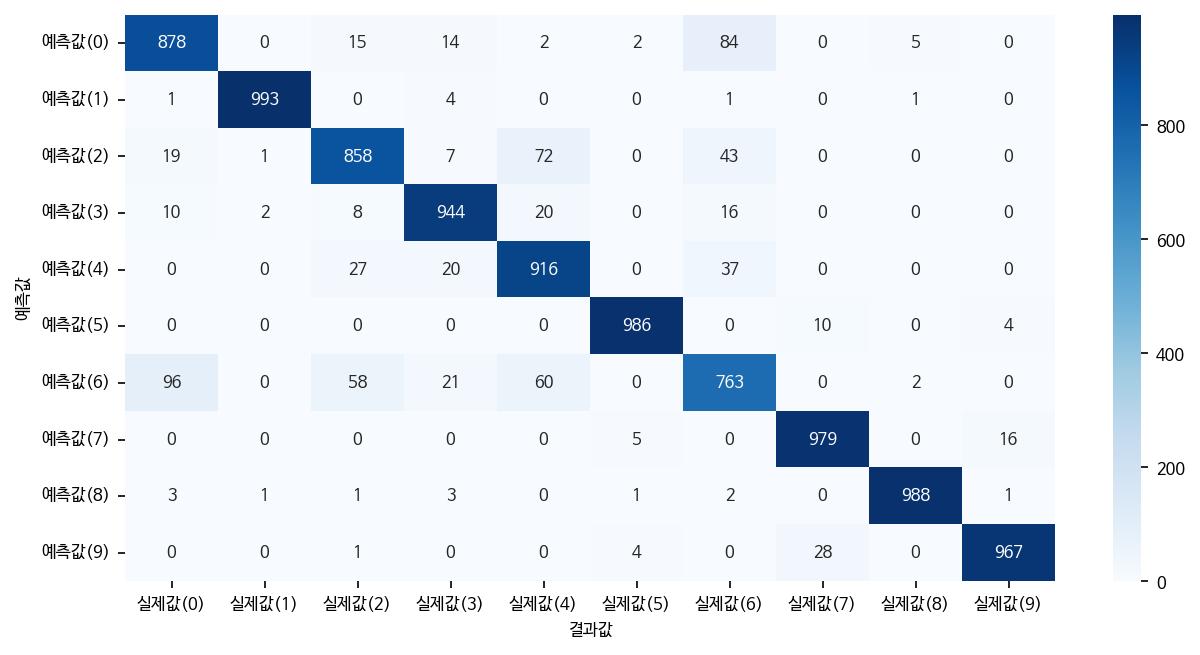

In [24]:
# --> 5를 분류할 때 가장 많이 혼란스러워 한다.
# --> 오차행렬은 모델의 강점과 약점을 파악하기에 유용하다.
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 8
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cmdf2, annot = True, fmt = 'd', cmap = 'Blues', ax=ax)
ax.set_xlabel('결과값')
ax.set_ylabel('예측값')
plt.savefig('fasion4.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()